In [1]:
#Basic Python lib
import numpy
import pandas

from sklearn.ensemble import ExtraTreesClassifier


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/av-healthcare-analytics-ii/healthcare/train_data_dictionary.csv
/kaggle/input/av-healthcare-analytics-ii/healthcare/test_data.csv
/kaggle/input/av-healthcare-analytics-ii/healthcare/train_data.csv
/kaggle/input/av-healthcare-analytics-ii/healthcare/sample_sub.csv


In [3]:
#Data Read
file_path = '../input/av-healthcare-analytics-ii/healthcare'
train_data = pd.read_csv(f'{file_path}/train_data.csv')
test_data = pd.read_csv(f'{file_path}/test_data.csv')


In [4]:
import pandas_profiling

In [5]:
# preparing profile report

profile_report = pandas_profiling.ProfileReport(train_data,minimal=True)
profile_report

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [6]:
# function for filling null values by replacing them with the most occured value

def fill_null(df):
  df['Bed Grade'].fillna(df['Bed Grade'].value_counts().index[0],inplace=True)
  df['City_Code_Patient'].fillna(df['City_Code_Patient'].value_counts().index[0],inplace=True)

In [7]:
# filling null values of train data

fill_null(train_data)

In [8]:
# converting categorical features to numerical 

def convert_to_numerical(df):
  dept_list = df['Department'].unique()
  dept_list.sort()
  dept_dict = dict(zip(dept_list, range(len(dept_list))))
  df['Department'].replace(dept_dict, inplace=True)


  hrc_list = df['Hospital_region_code'].unique()
  hrc_list.sort()
  hrc_dict = dict(zip(hrc_list, range(len(hrc_list))))
  df['Hospital_region_code'].replace(hrc_dict, inplace=True)

  ward_list = df['Ward_Type'].unique()
  ward_list.sort()
  ward_dict = dict(zip(ward_list, range(len(ward_list))))
  df['Ward_Type'].replace(ward_dict, inplace=True)

  wfc_list = df['Ward_Facility_Code'].unique()
  wfc_list.sort()
  wfc_dict = dict(zip(wfc_list, range(len(wfc_list))))
  df['Ward_Facility_Code'].replace(wfc_dict, inplace=True)

  toa_list = df['Type of Admission'].unique()
  toa_list.sort()
  toa_dict = dict(zip(toa_list, range(len(toa_list))))
  df['Type of Admission'].replace(toa_dict, inplace=True)

  soi_list = df['Severity of Illness'].unique()
  soi_list.sort()
  soi_dict = dict(zip(soi_list, range(len(soi_list))))
  df['Severity of Illness'].replace(soi_dict, inplace=True)

  age_list = df['Age'].unique() 
  age_list.sort()
  age_dict = dict(zip(age_list, range(len(age_list))))
  df['Age'].replace(age_dict, inplace=True)

  htc_list = df['Hospital_type_code'].unique()
  htc_list.sort()
  htc_dict = dict(zip(htc_list, range(len(htc_list))))
  df['Hospital_type_code'].replace(htc_dict, inplace=True)

In [9]:
# converting categorical features of train data into numerical

convert_to_numerical(train_data)

In [10]:
# converting categorical target feature into numerical

stay_list = train_data['Stay'].unique()
stay_list.sort()
stay_dict = dict(zip(stay_list, range(len(stay_list))))
train_data['Stay'].replace(stay_dict, inplace=True)

In [11]:
df=train_data.copy()

In [12]:
df.describe()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,1.256841,4.771717,0.778098,3.197627,1.943779,1.888575,3.286913,2.625585,65747.579472,7.262506,0.782768,1.374076,3.284099,4.127777,4880.749392,2.698550
std,91925.276847,8.633755,1.535712,3.102535,0.752527,1.168171,0.561245,0.804655,1.688050,0.873070,37979.936440,4.712210,0.688957,0.768377,1.764061,1.889567,1086.776254,2.150075
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1800.000000,0.000000
25%,79610.250000,11.000000,0.000000,2.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,32847.000000,4.000000,0.000000,1.000000,2.000000,3.000000,4186.000000,1.000000
50%,159219.500000,19.000000,1.000000,5.000000,1.000000,3.000000,2.000000,2.000000,4.000000,3.000000,65724.500000,8.000000,1.000000,2.000000,3.000000,4.000000,4741.000000,2.000000
75%,238828.750000,26.000000,2.000000,7.000000,1.000000,4.000000,2.000000,2.000000,5.000000,3.000000,98470.000000,8.000000,1.000000,2.000000,4.000000,5.000000,5409.000000,3.000000
max,318438.000000,32.000000,6.000000,13.000000,2.000000,24.000000,4.000000,5.000000,5.000000,4.000000,131624.000000,38.000000,2.000000,2.000000,32.000000,9.000000,11008.000000,10.000000


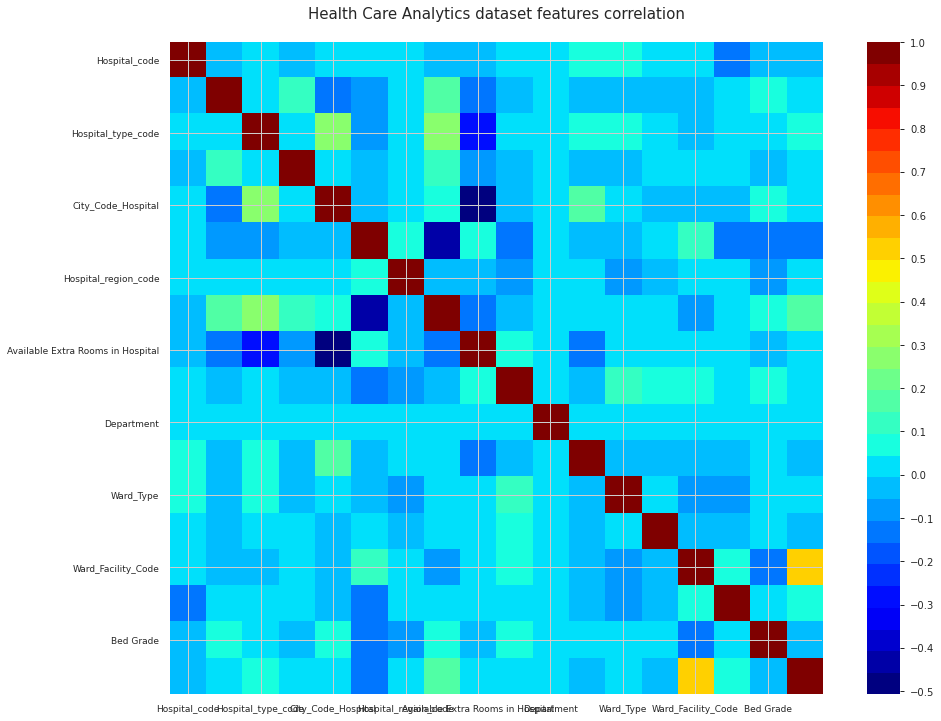

In [13]:
def correlation_matrix(d):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Health Care Analytics dataset features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

In [14]:
#Plotting data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

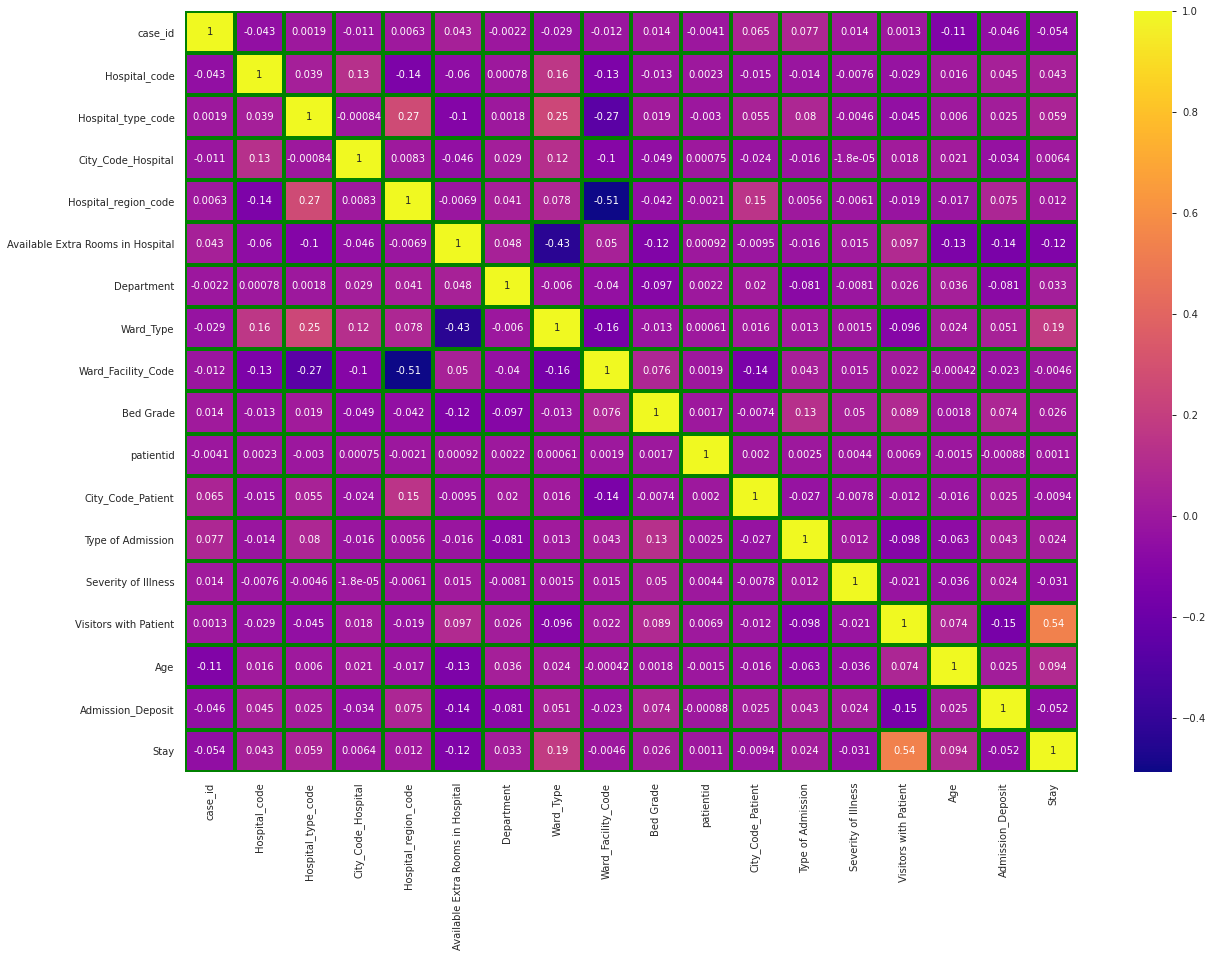

In [15]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True,linecolor='green',linewidths=3,cmap = 'plasma')

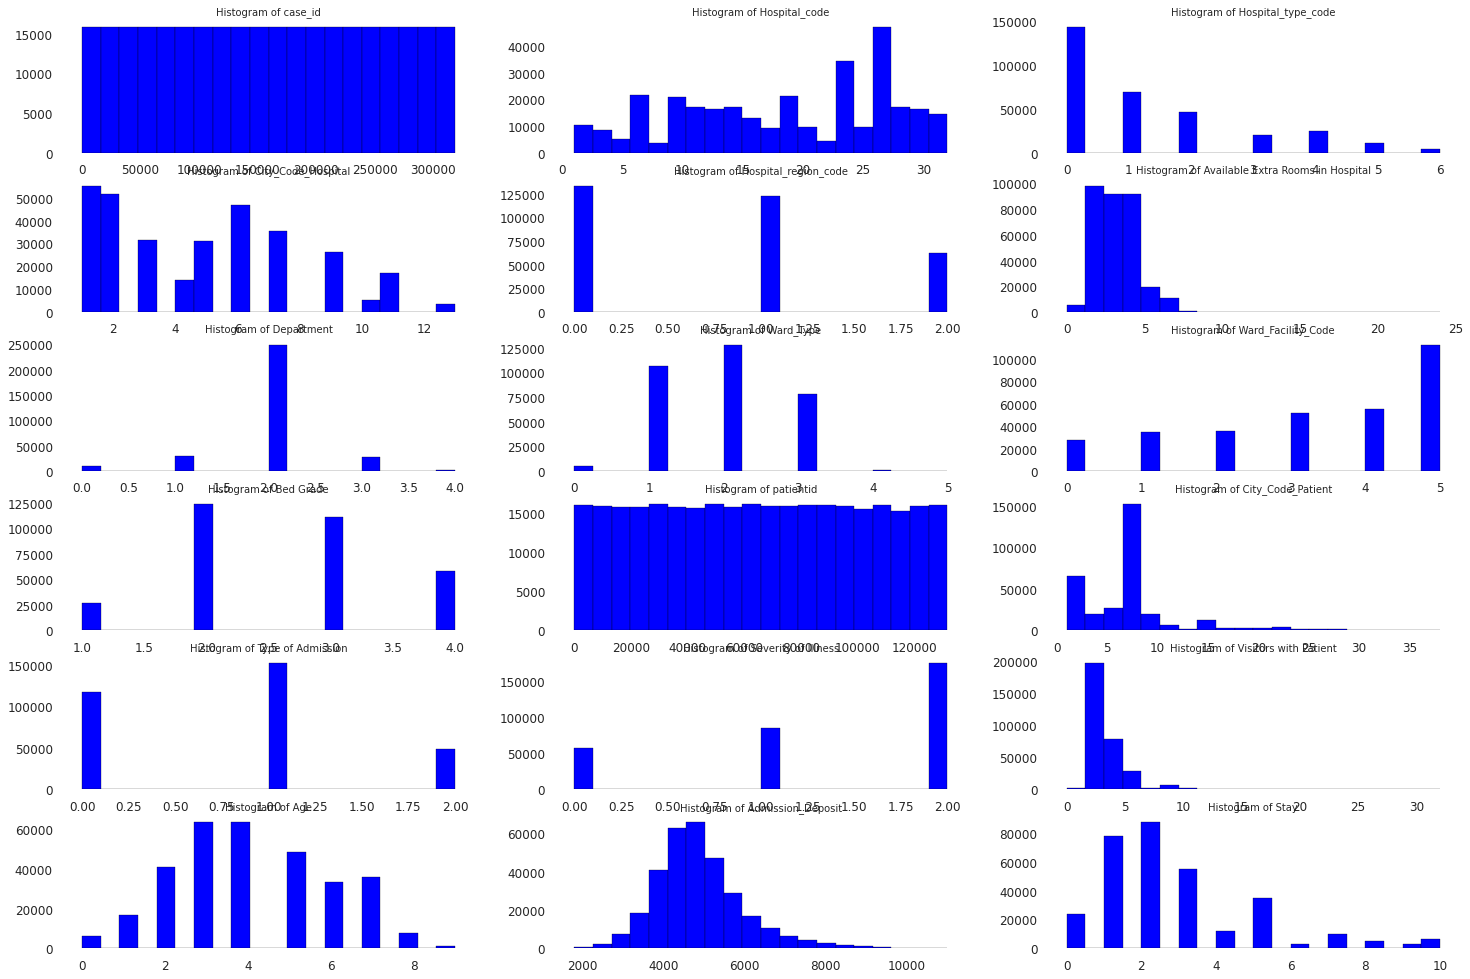

In [16]:
i=1
plt.figure(figsize=(25,20))
for c in df.describe().columns[:]:
    plt.subplot(7,3,i)
    plt.title(f"Histogram of {c}",fontsize=10)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(df[c],bins=20,color='blue',edgecolor='k')
    i+=1
plt.show()

In [17]:
df.apply(lambda x: sum(x.isnull()),axis=0)

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

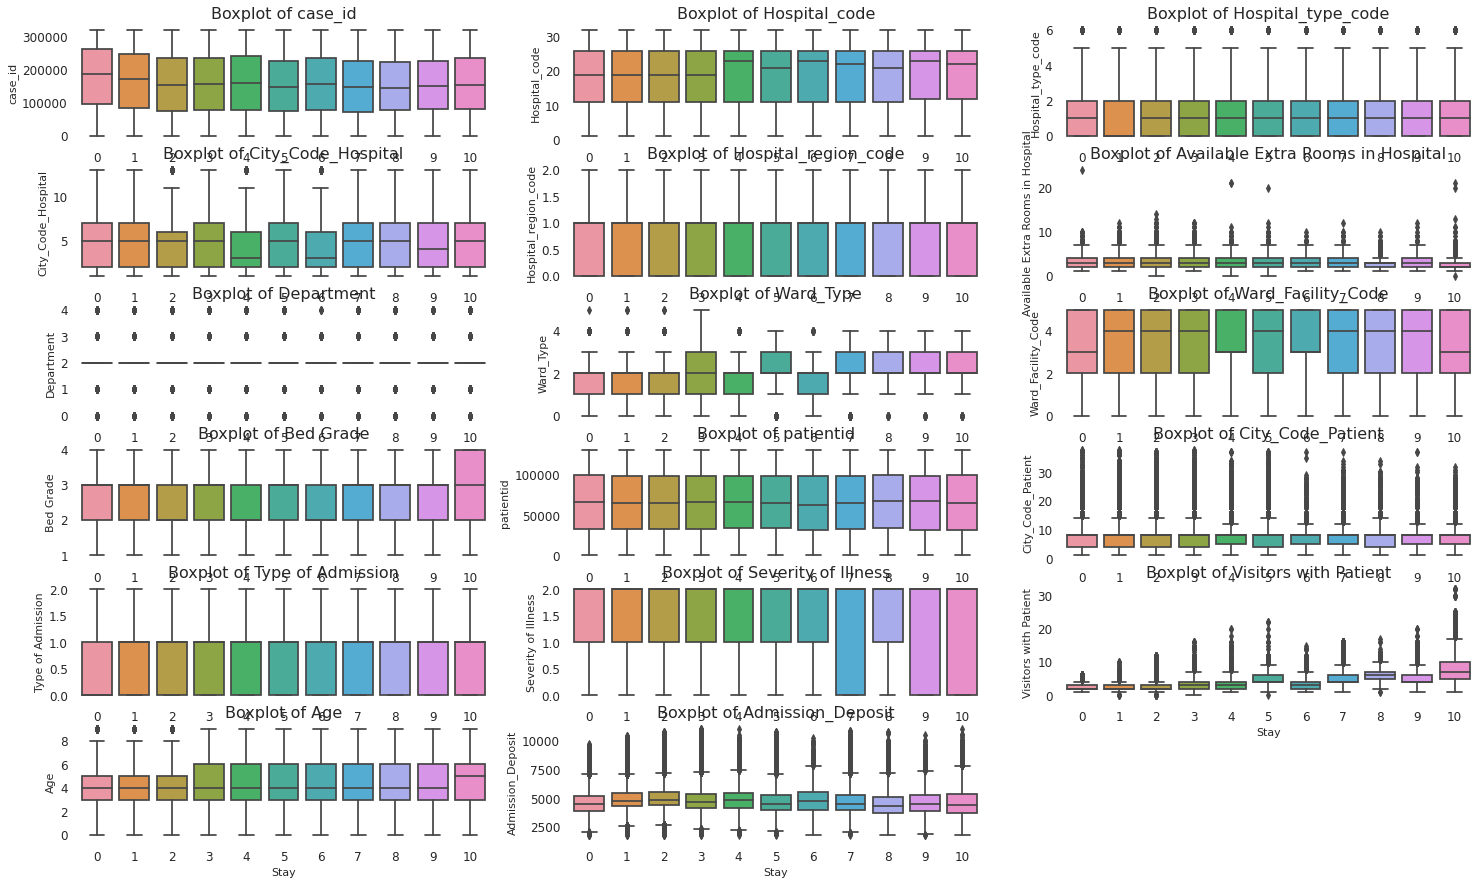

In [18]:
i=1
plt.figure(figsize=(25,15))
for c in df.columns[:-1]:
    plt.subplot(6,3,i)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['Stay'])
    i+=1
plt.show()